In [1]:
import numpy as np
import tensorflow as tf
# Set the seed for NumPy
np.random.seed(42)
# Set the seed for TensorFlow
tf.random.set_seed(42)

In [2]:
import os, glob
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [3]:
# Checking the contents of xrays folder
data_dir = "/content/drive/MyDrive/Data/archive/covid"
data_dir

'/content/drive/MyDrive/Data/archive/covid'

In [4]:
# Gettting the list of folders from data dir
subfolders = os.listdir(data_dir)
subfolders

['COVID-19 (394).jpg',
 'COVID-19 (575).jpg',
 'COVID-19 (509).jpg',
 'COVID-19 (594).jpg',
 'COVID-19 (664).jpg',
 'COVID-19 (686).jpg',
 'COVID-19 (412).jpg',
 'COVID-19 (597).jpg',
 'COVID-19 (544).jpg',
 'COVID-19 (661).jpg',
 'COVID-19 (650).jpg',
 'COVID-19 (532).jpg',
 'COVID-19 (692).jpg',
 'COVID-19 (68).jpg',
 'COVID-19 (702).jpg',
 'COVID-19 (468).jpg',
 'COVID-19 (382).jpg',
 'COVID-19 (551).jpg',
 'COVID-19 (439).jpg',
 'COVID-19 (379).jpg',
 'COVID-19 (52).jpg',
 'COVID-19 (656).jpg',
 'COVID-19 (688).jpg',
 'COVID-19 (372).jpg',
 'COVID-19 (665).jpg',
 'COVID-19 (624).jpg',
 'COVID-19 (676).jpg',
 'COVID-19 (445).jpg',
 'COVID-19 (584).jpg',
 'COVID-19 (423).jpg',
 'COVID-19 (555).jpg',
 'COVID-19 (503).jpg',
 'COVID-19 (658).jpg',
 'COVID-19 (593).jpg',
 'COVID-19 (473).jpg',
 'COVID-19 (681).jpg',
 'COVID-19 (387).jpg',
 'COVID-19 (553).jpg',
 'COVID-19 (526).jpg',
 'COVID-19 (637).jpg',
 'COVID-19 (671).jpg',
 'COVID-19 (618).jpg',
 'COVID-19 (6).jpeg',
 'COVID-19 (38

In [5]:
# Getting list of img file paths (no folders)
img_files = glob.glob(data_dir+"**/*")
len(img_files)

2313

In [6]:
# Take a look at the first 5 filepaths
img_files[0:5]

['/content/drive/MyDrive/Data/archive/covid/COVID-19 (394).jpg',
 '/content/drive/MyDrive/Data/archive/covid/COVID-19 (575).jpg',
 '/content/drive/MyDrive/Data/archive/covid/COVID-19 (509).jpg',
 '/content/drive/MyDrive/Data/archive/covid/COVID-19 (594).jpg',
 '/content/drive/MyDrive/Data/archive/covid/COVID-19 (664).jpg']

In [7]:
# Preview an example image (at full size)
img_loaded = load_img(img_files[0])
img_data = img_to_array(img_loaded)
img_data.shape

(1024, 1024, 3)

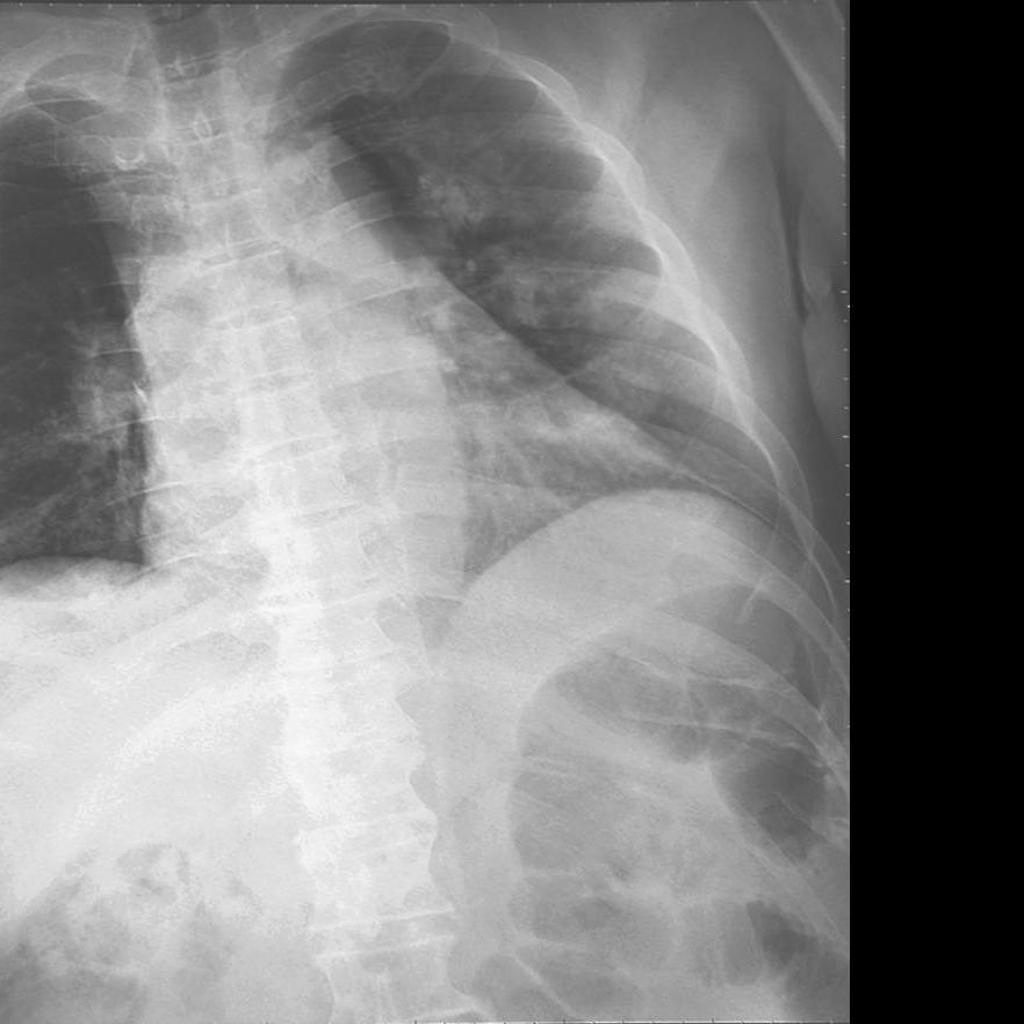

In [8]:
# Data can be converted back to image
array_to_img(img_data)

In [9]:
# Saving image params as vars for reuse
batch_size = 32
img_height = 96
img_width = 96

In [10]:
# make the dataset from the main folder of images
ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    label_mode='categorical',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
ds

Found 0 files belonging to 0 classes.


ValueError: No images found in directory /content/drive/MyDrive/Data/archive/covid. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [ ]:
# Determine number of batches in dataset
ds_size = len(ds)
ds_size

In [ ]:
# taking a sample batch to see batch shape
example_batch_imgs,example_batch_y= ds.take(1).get_single_element()
example_batch_imgs.shape

In [ ]:
# Preview y for first 5 of first batch
example_batch_y[0:5]

In [ ]:
# checking the class names
class_names = ds.class_names
class_names

In [ ]:
# Saving # of classes for reuse
num_classes = len(class_names)
num_classes

In [ ]:
# Saving dictionary of integer:string labels
class_dict = dict(zip(range(num_classes), class_names))
class_dict

In [ ]:
# Individual image shape
input_shape = example_batch_imgs[0].shape
input_shape

In [ ]:
# Demo Unpacking shape
input_shape = [*input_shape]
input_shape

In [ ]:
# Set the ratio of the train, validation, test split
split_train = 0.7
split_val = 0.2
split_test = .1
# Calculate the number of batches for training and validation data
n_train_batches =  int(ds_size * split_train)
n_val_batches = int(ds_size * split_val)
print(f"Use {n_train_batches} batches as training data")
print(f"Use {n_val_batches} batches as validation data")
print(f"The remaining {len(ds)- (n_train_batches+n_val_batches)} batches will be used as test data.")

In [ ]:
# Use .take to slice out the number of batches
train_ds = ds.take(n_train_batches)
# Confirm the length of the training set
len(train_ds)

In [ ]:
# Skipover the training batches
val_ds = ds.skip(n_train_batches)
# Take the correct number of validation batches
val_ds = val_ds.take(n_val_batches)
# Confirm the length of the validation set
len(val_ds)

In [ ]:
# Skip over all of the training + validation batches
test_ds = ds.skip(n_train_batches + n_val_batches)
# Confirm the length of the testing data
len(test_ds)

In [ ]:
# The original (non-take/non-skip) dataset contains the class_names
class_names  = ds.class_names
class_names

In [ ]:
# Write the building and compiling steps within a function
def build_model():
    # Instantatie model
    model = models.Sequential()
    # Scaling layer
    scaling_layer = layers.Rescaling(1./255, input_shape=input_shape)
    model.add(scaling_layer)

    # Convolutional layer
    model.add(
        layers.Conv2D(
            filters=8,  # How many filters you want to use
            kernel_size=3,  # size of each filter
            input_shape=input_shape,
            padding='same'
        ))
    # Pooling layer
    model.add(layers.MaxPooling2D(pool_size=2))  # Size of pooling
    # Convolutional layer
    model.add(
        layers.Conv2D(
            filters=8,  # How many filters you want to use
            kernel_size=3,  # size of each filter
            input_shape=input_shape,
            padding='same'
        ))
    # Pooling layer
    model.add(layers.MaxPooling2D(pool_size=2))  # Size of pooling

    # Flattening layer
    model.add(layers.Flatten())
    # Output layer
    model.add(
        layers.Dense(3, activation="softmax")  # How many output possibilities we have
    )  # What activation function are you using?

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()
    return model

In [ ]:
# Build the model
model1 = build_model()

In [ ]:
import datetime as dt
# timing
start = dt.datetime.now()

# fit the neural network
epochs=5
history = model1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

end = dt.datetime.now()
dur = end-start
print(f"Training time: {dur}")

In [ ]:
# Use autotune to automatically determine best buffer sizes
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
# Make buffer size the same as the number of batches in train_ds
buffer_size = len(train_ds)
buffer_size

In [ ]:
# Optimize training data
train_ds = train_ds.cache().shuffle(buffer_size= buffer_size,
                                   seed=42).prefetch(buffer_size=AUTOTUNE)
# Optimize validation data
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# Optimize teset data
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Call build function to create identical model
model2 = build_model()

In [ ]:
# See how long it takes to fit the optimized dataset
# timing
start = dt.datetime.now()
# fit the neural network
epochs=5
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)
end = dt.datetime.now()
dur2 = end-start
print(f"Training time: {dur2}")

In [ ]:
print(f"The optimized dataset was {dur/dur2:.2f} times faster!")